In [1]:
import pandas as pd

df = pd.read_csv('movie_metadata.csv')
df = df.dropna()

# Check correlation between budget and gross

<BarContainer object of 37 artists>

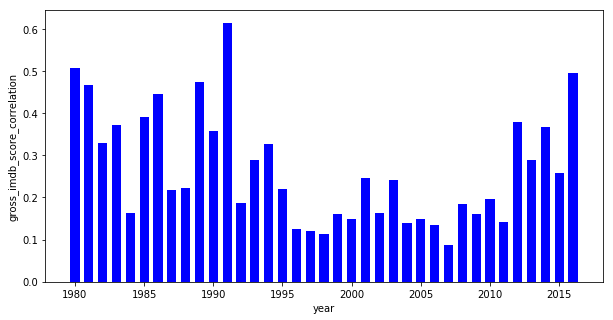

In [32]:
import copy
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

year_set = set()
year_set.update(df['title_year'])
li = []
for year in year_set:
    if year>=1980:
        df_budget_gross = copy.deepcopy(pd.DataFrame(data=df[df['title_year']==year].dropna(axis=0)))
        df_budget_gross = df_budget_gross[['imdb_score','gross']]
        li.append((year,df_budget_gross.corr()['imdb_score']['gross']))
        
df2 = pd.DataFrame(li)

width = 1/1.5
plt.figure(figsize=(10,5))
plt.xlabel('year')
plt.ylabel('gross_imdb_score_correlation')
plt.bar(df2.iloc[:,0], df2.iloc[:,1],width, color="blue")

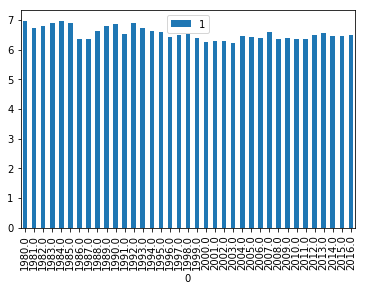

In [3]:
import copy

year_set = set()
year_set.update(df['title_year'])
li = []
for year in year_set:
    if year>=1980:
        df_imdb_score = copy.deepcopy(pd.DataFrame(data=df[df['title_year']==year].dropna(axis=0)))
        df_imdb_score = df_imdb_score['imdb_score']
        li.append((year,df_imdb_score.mean()))
df2 = pd.DataFrame(li)
#df2.head(20)
df2.plot.bar(x=0,y=1)

<BarContainer object of 47 artists>

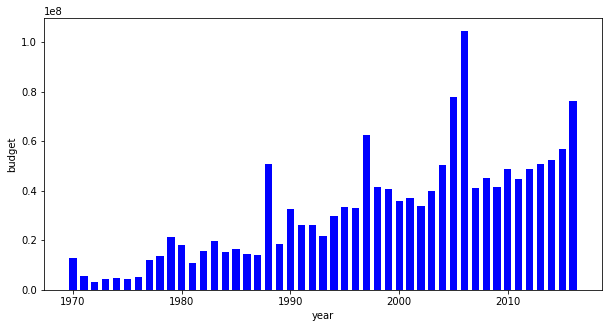

In [33]:
import copy

year_set = set()
year_set.update(df['title_year'])
li = []
for year in year_set:
    if year>=1970:
        df_budget = copy.deepcopy(pd.DataFrame(data=df[df['title_year']==year].dropna(axis=0)))
        df_budget = df_budget['budget']
        li.append((year,df_budget.mean()))
df2 = pd.DataFrame(li)
#df2.head(20)
width = 1/1.5
plt.figure(figsize=(10,5))
plt.xlabel('year')
plt.ylabel('budget')
plt.bar(df2.iloc[:,0], df2.iloc[:,1],width, color="blue")

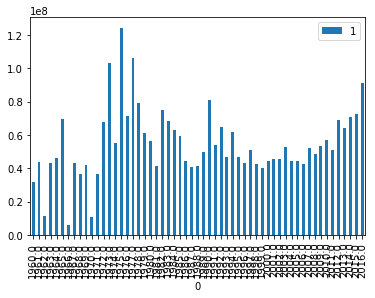

In [5]:
import copy

year_set = set()
year_set.update(df['title_year'])
li = []
for year in year_set:
    if year>=1960:
        df_gross = copy.deepcopy(pd.DataFrame(data=df[df['title_year']==year].dropna(axis=0)))
        df_gross = df_gross['gross']
        li.append((year,df_gross.mean()))
df2 = pd.DataFrame(li)
#df2.head(20)
df2.plot.bar(x=0,y=1)

# IMDB Score distribution

count    3756.000000
mean        6.465282
std         1.056247
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64


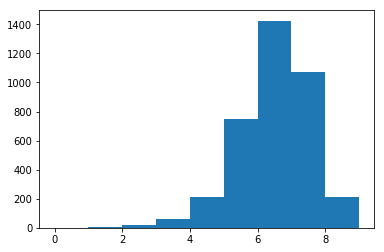

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df['imdb_score'],bins=[i for i in range(0,10,1)])
print(df['imdb_score'].describe())

# Heatmap

In [7]:
import numpy as np
import seaborn as sns

def heatMap(df):
    """ Params: df - DataFrame of our Abalone data Return: Generates a heatmap plot"""
    #Create Correlation df
    corr = df.corr()
    #filter_df = df.loc[:, corr['SM14_Bucket'] > 0.425]
    #corr = filter_df.corr()
    
    #Plot figsize
    fig, ax = plt.subplots(figsize=(40, 40))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".3f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

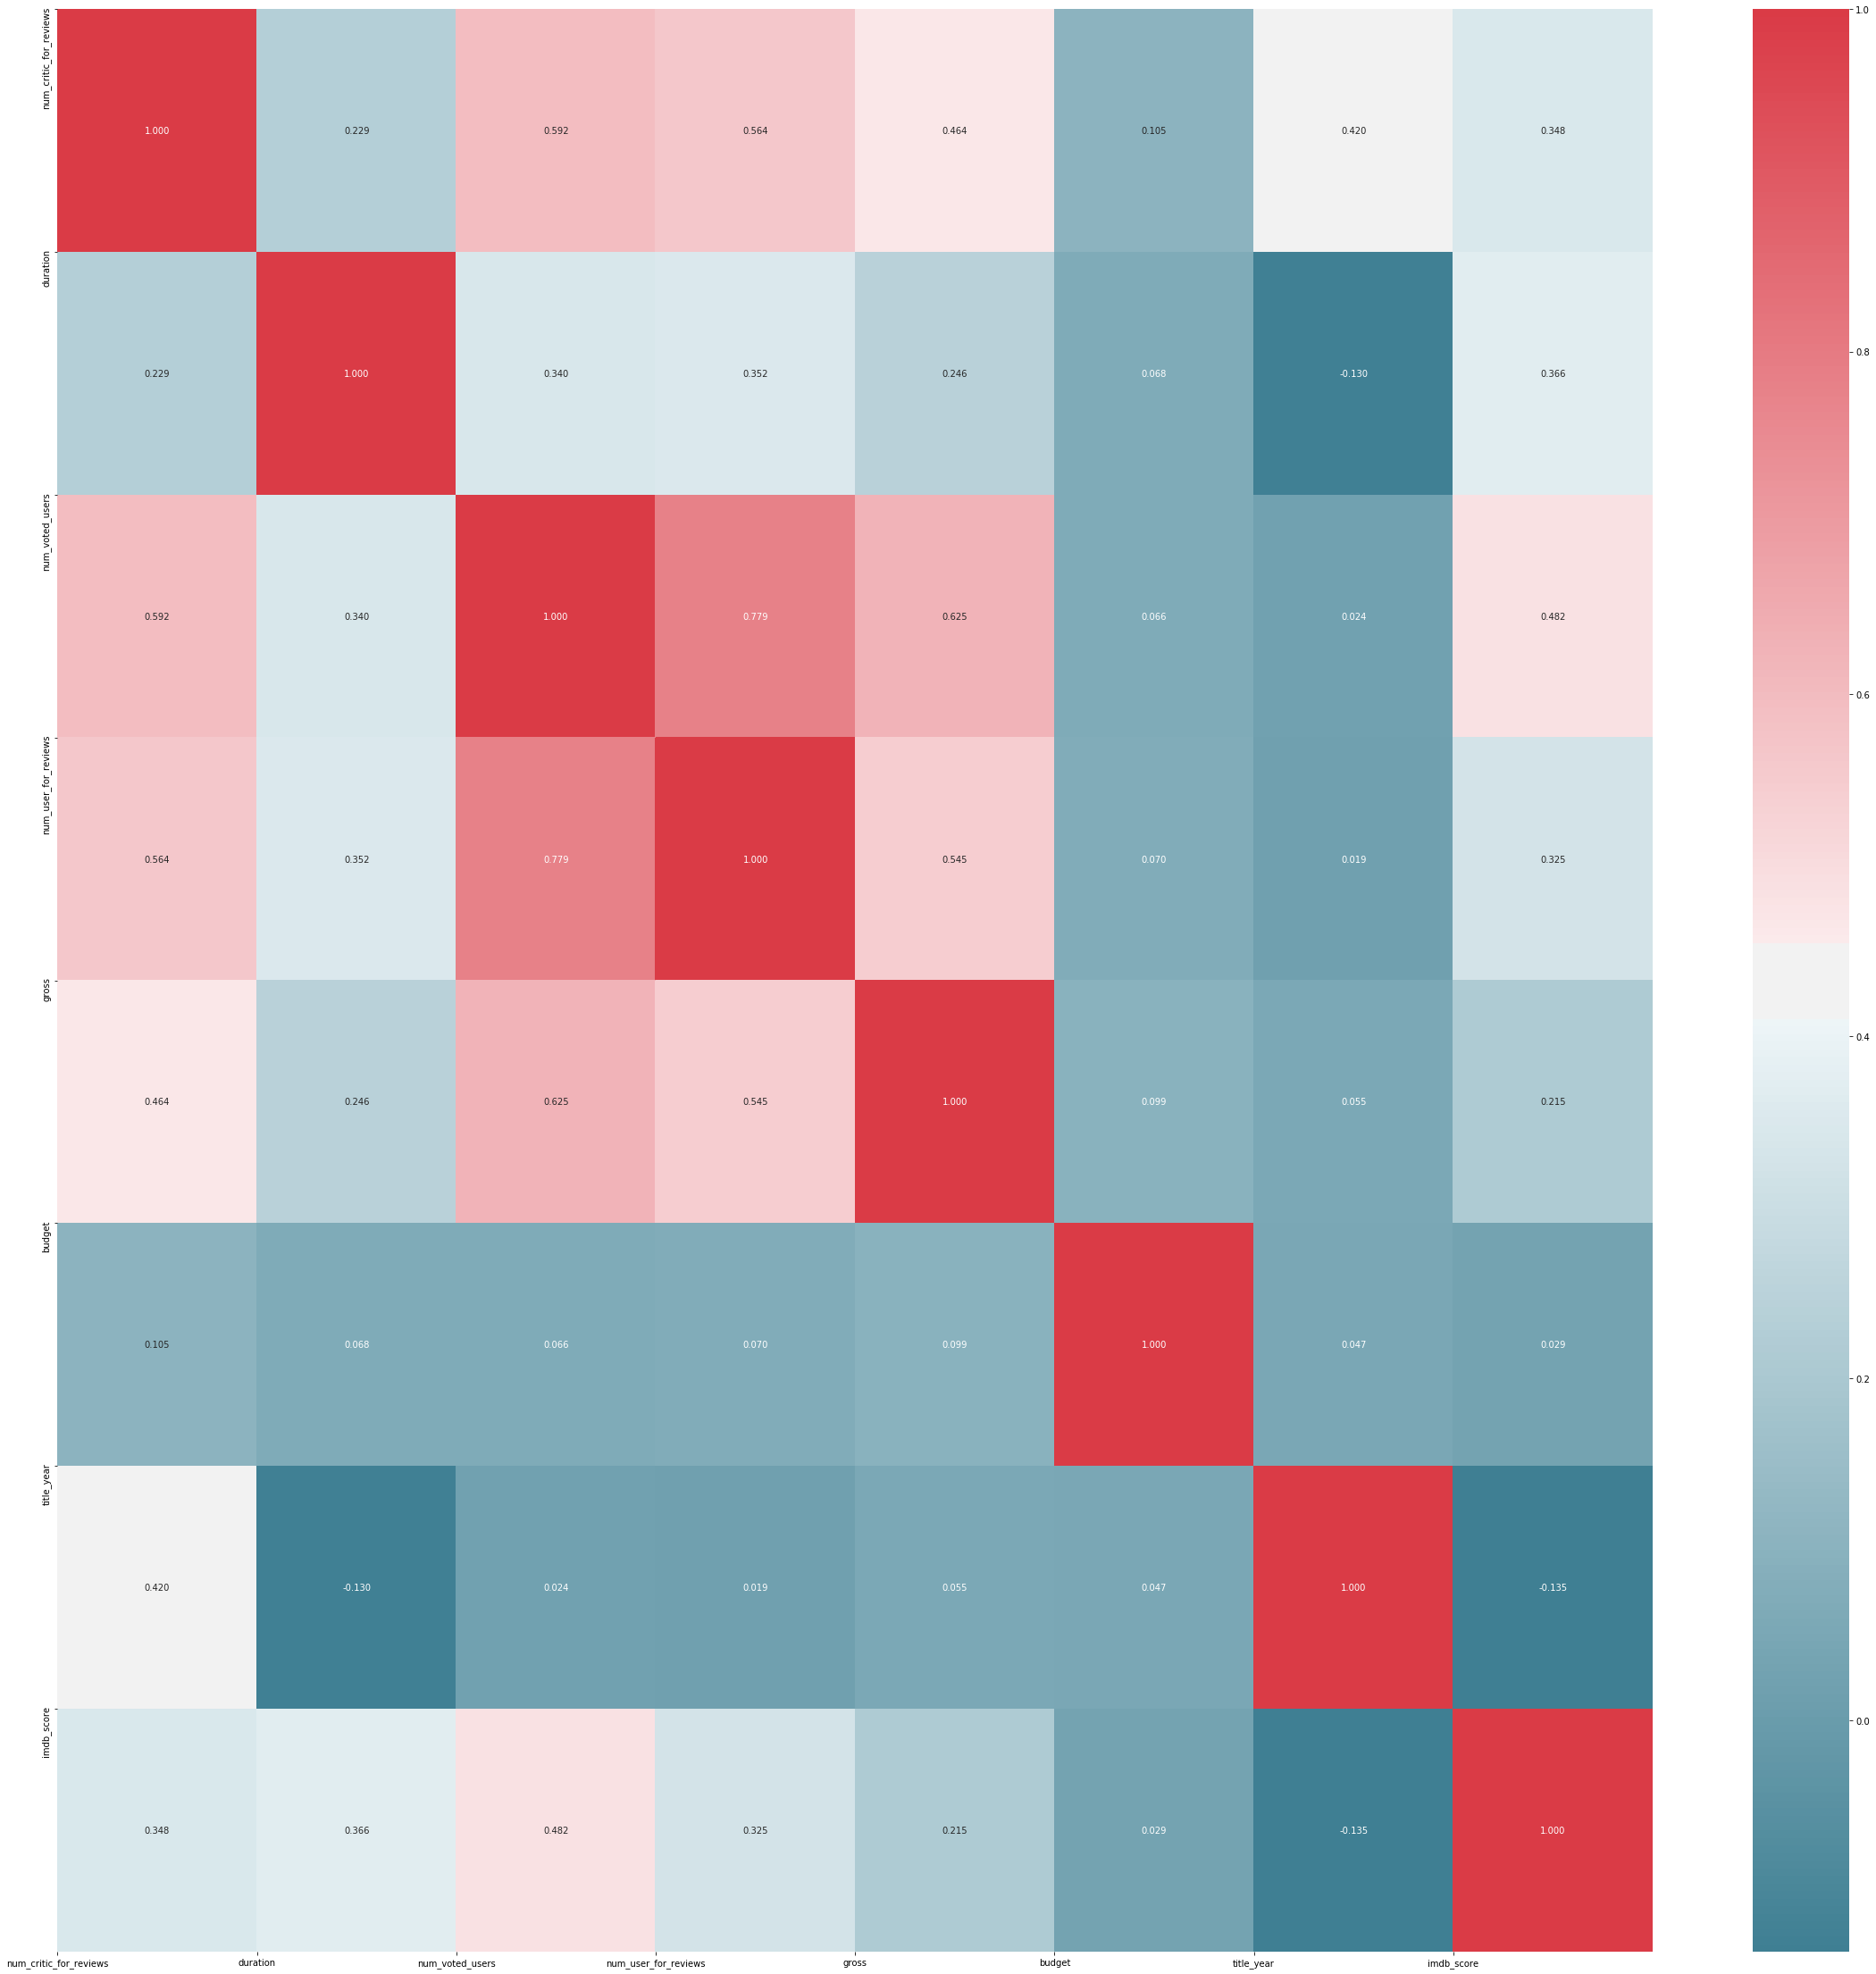

In [8]:
relevant_columns_non_unordered_categorical = ['num_critic_for_reviews','duration',
                    'num_voted_users','num_user_for_reviews',
                    'gross','budget','title_year','imdb_score']
heatMap(df[relevant_columns_non_unordered_categorical])

# Unique genres

In [9]:
unique = pd.Series(df['genres'].values).unique()
count = np.count_nonzero(unique)
print(count)

745


In [10]:
def get_genres(df):
    genre_set = set()
    for index,row in df.iterrows():
        genre_set.update(row['genres'].split('|'))
    return genre_set
       
genre_set = get_genres(df)
print(len(genre_set))

22


(3756, 28)


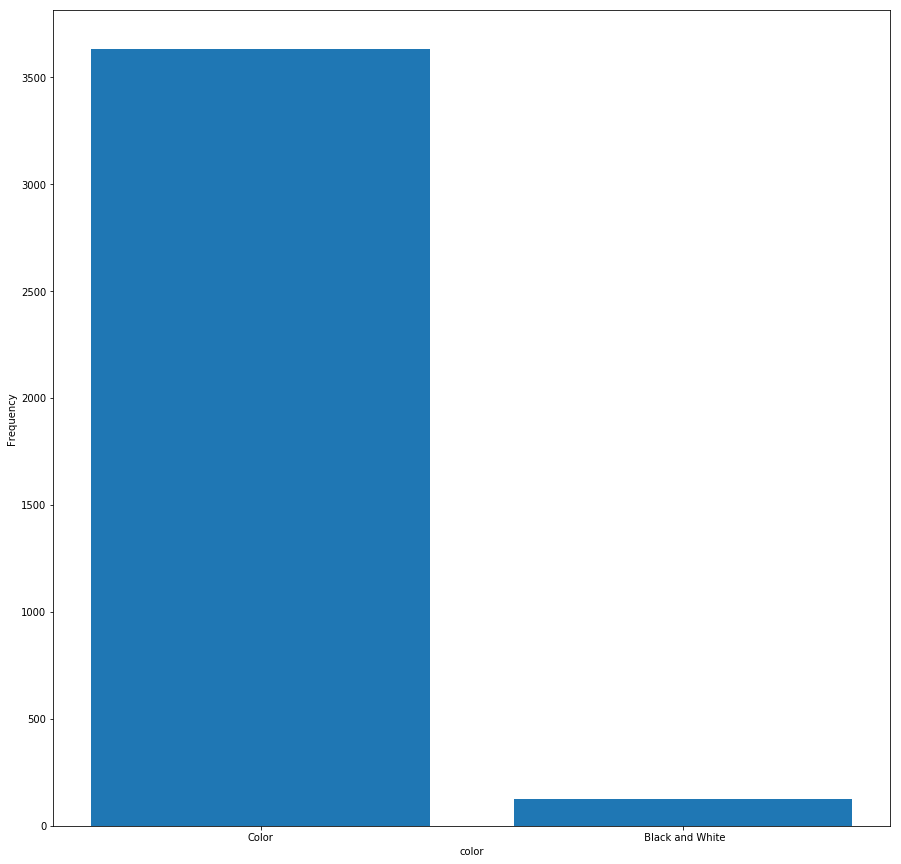

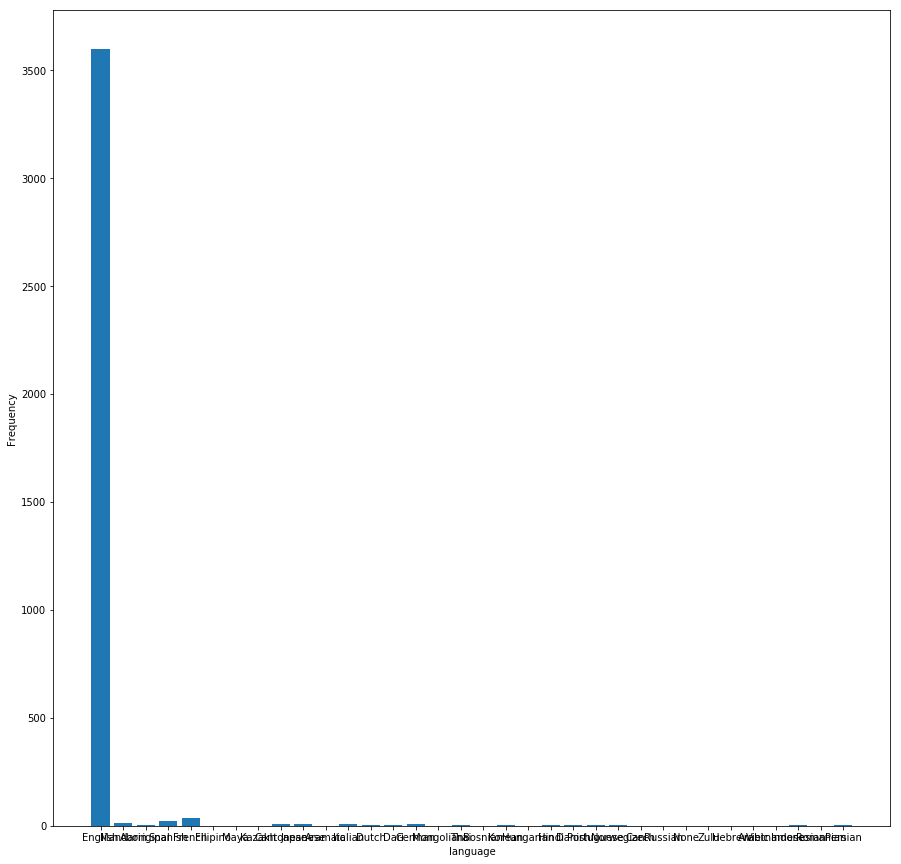

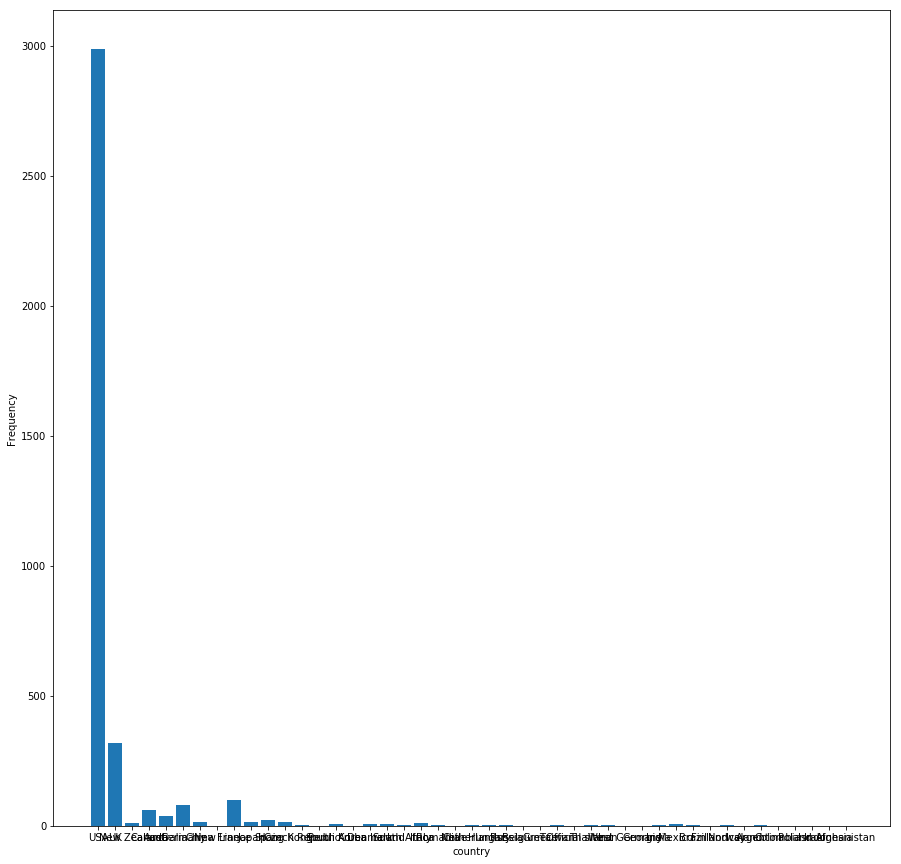

In [11]:
relevant_columns = ['color','language','country']
print(df.shape)
for column in relevant_columns:
    dtype = df[column].dtype
    
    #Categorical columns
    if dtype == 'object':
        column_dict ={}
        unique = pd.Series(df[column].fillna(np.nan).values).unique()
          
        for unique_value in unique:
            column_dict[unique_value] = df[df[column] == unique_value][column].count()
        
        ypos = np.arange(len(column_dict.keys()))
        plt.figure(figsize=(15,15))
        plt.xticks(ypos,column_dict.keys())
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.bar(ypos,column_dict.values())
        plt.show()
        plt.close()

In [12]:
def observe(data,year):
    year_df = data[data['title_year'] == year]
    movie_count = year_df.shape[0]

    plt.hist(year_df['gross'])
    plt.xlabel('gross: ' + str(year))
    plt.ylabel("Frequency") 
    plt.title('year: ' + str(year) + ' total_movies: ' +  str(movie_count))
    plt.show()
    plt.close()

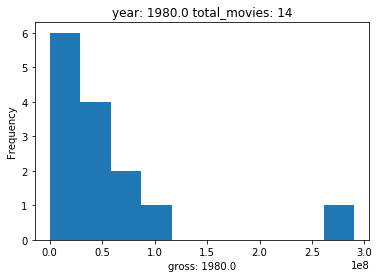

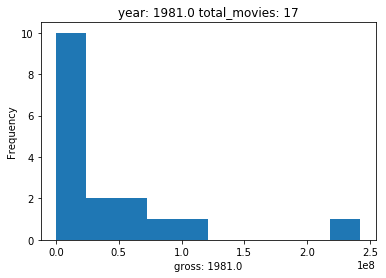

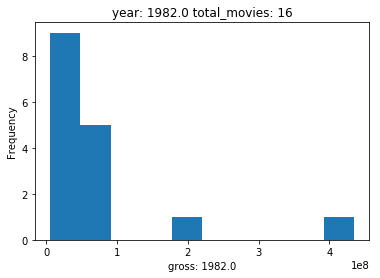

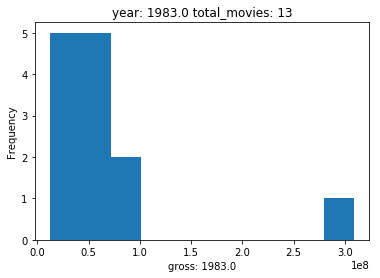

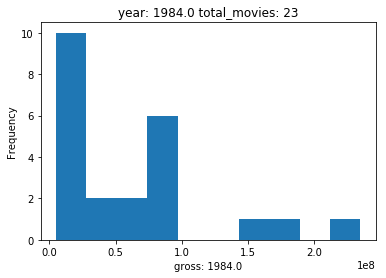

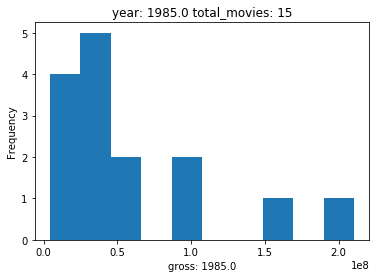

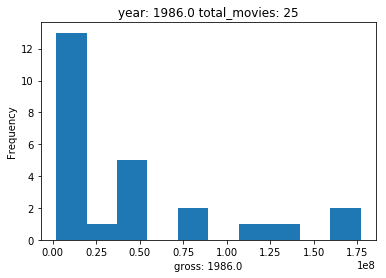

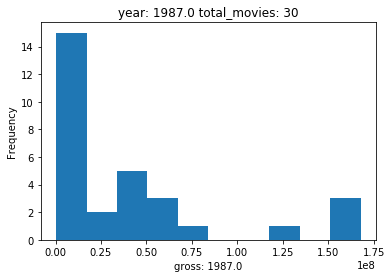

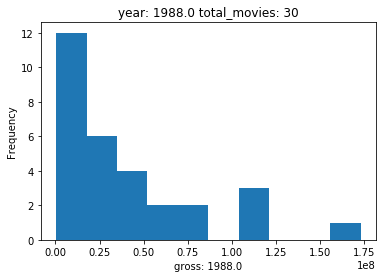

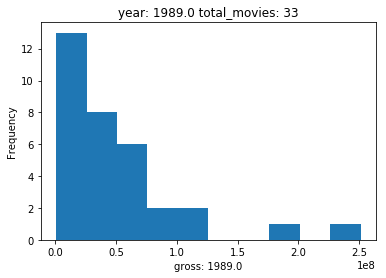

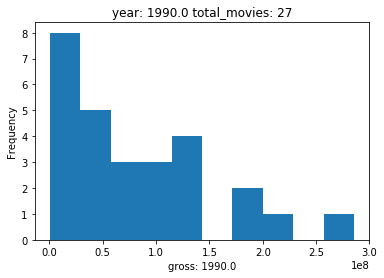

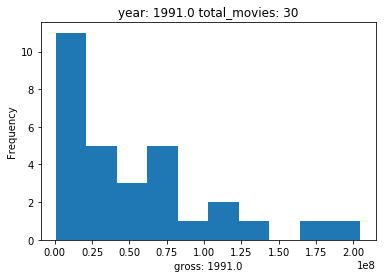

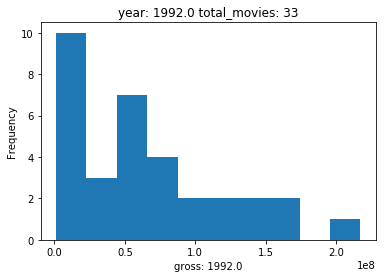

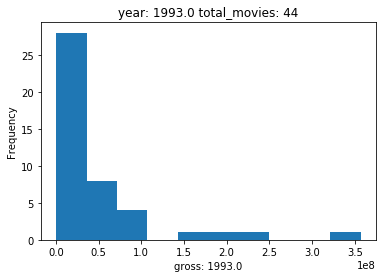

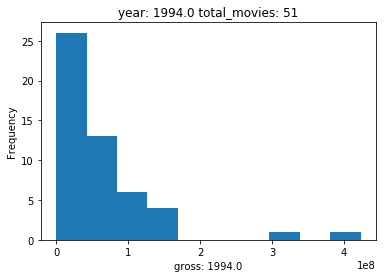

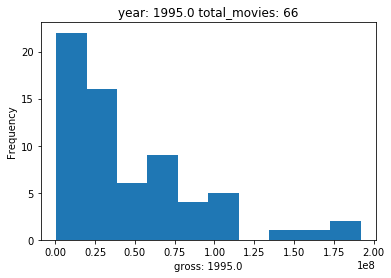

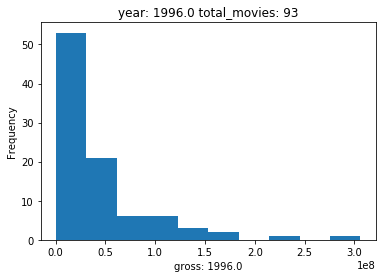

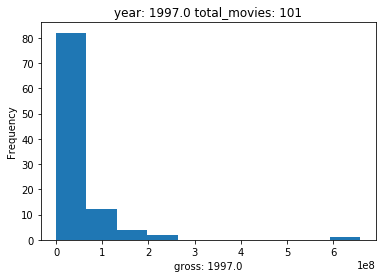

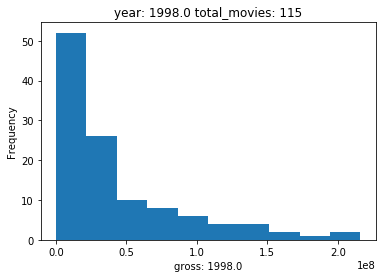

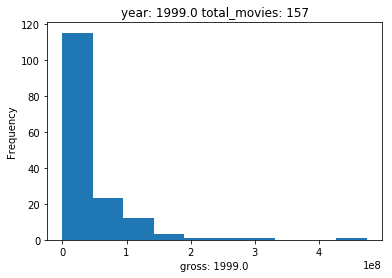

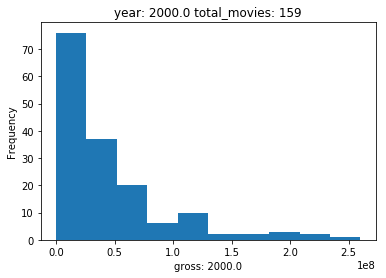

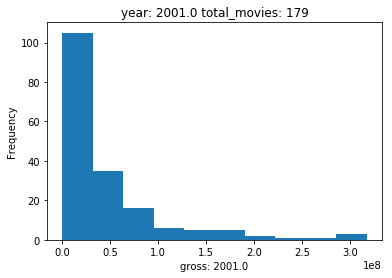

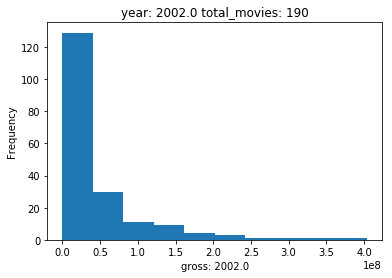

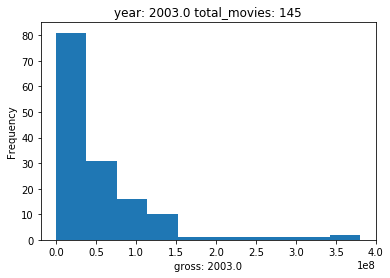

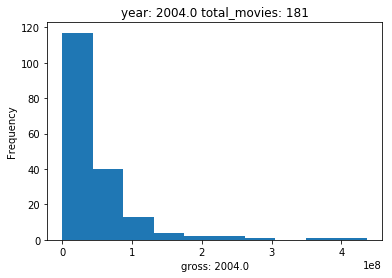

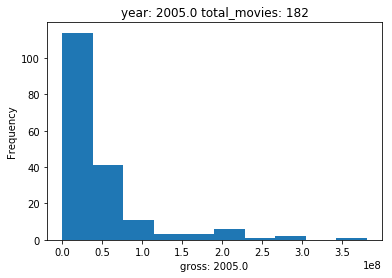

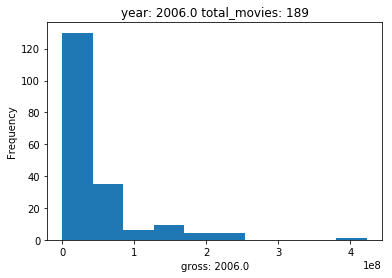

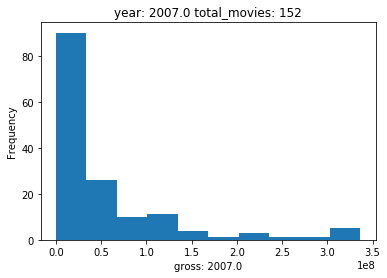

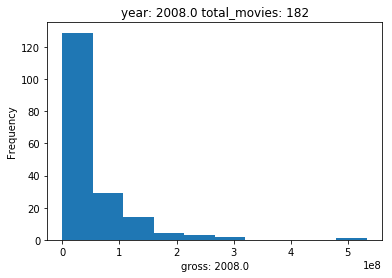

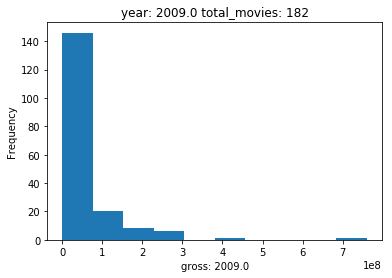

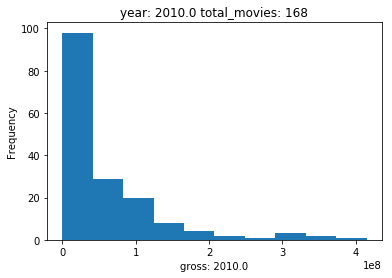

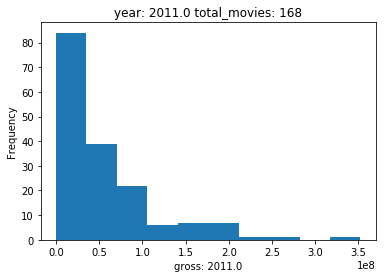

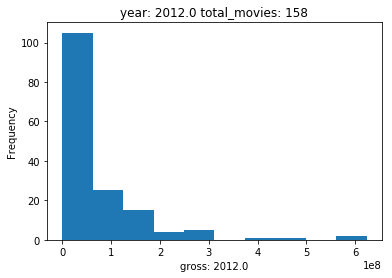

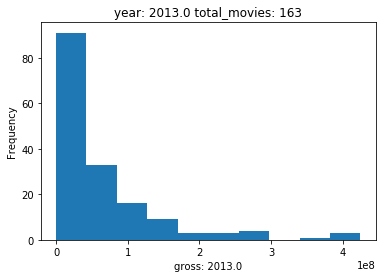

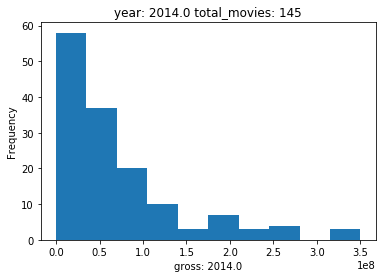

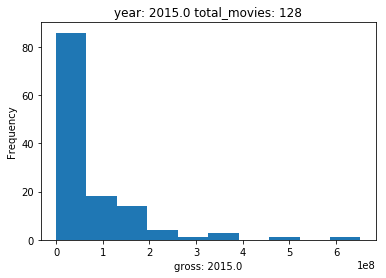

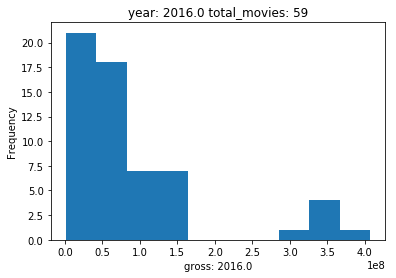

(3756, 28)


In [13]:
year_set = set()
year_set.update(df['title_year'])

for year in year_set:
    if (year>=1980):
        observe(df,year)

print(df.shape)